---
##### 1. CONEXIÓN
---

In [1]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


---
##### 2. IMPORTAR LIBRERÍAS
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import train_test_split , KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier

---
##### 3. CARGA DE DATOS
---

In [3]:
# Leer el archivo Excel
file_path = "/content/drive/MyDrive/Practica 3/dabe de datos.xlsx"
df = pd.read_excel(file_path)

---
##### 4.  ANÁLISIS DE LAS ENTRADAS
---

In [4]:
# ========================================
# VARIABLES
# ========================================

print('*** CLASES ***')
for col in df.columns:
    print(f'- {col}')

print('Cantidad de filas en la base de datos: ',len(df))

*** CLASES ***
- Num caso
- Aseguradora -Código-
- Aseguradora -Descripción-
- Edad
- Grupo Edad
- Sexo
- Codigo de ciudad
- Fecha de ingreso
- Tipo de ingreso
- Fecha de egreso
- Días estancia
- ServicioAlta
- Cuidados intensivos
- Días de Unidad Cuidado Intensivo
- Dx de ingreso
- Dx principal de egreso 
- Dx principal de egreso .1
- Dx Ppal 3 Caracteres
- Dxr 1
- Dxr 2
- Dxr 3
- Dxr 4
- Dxr 5
- Dxr-6
- Dxr 7
- Dxr 8
- Dxr 9
- Dxr 10 
- Código causa externa
- Causa externa
- Situacion al alta
- Proc1
- Proc2
- Proc3
- Proc4
- Proc5
- Proc6
- Proc7
- Proc8
- Proc9
- Proc10
- Proc11
- Proc12
- Proc13
- Proc14
- Proc15
- Proc16
- Proc17
- Proc18
- Proc19
- Proc20
- Proc21
- Proc22
- Proc23
- Proc24
- Proc25
- Proc26
- Proc27
- Proc28
- Proc29
- Proc30
- Tipo servicio
- Causa Basica de muerte
- Infecciones
- Infección Quirurgica
- GRD -Código
- GRD -Descripción
- Tipo GRD
Cantidad de filas en la base de datos:  27869


Dado que el objetivo principal del proyecto es desarrollar un sistema de predicción de Grupos Relacionados por el Diagnóstico (GRD) al momento del triaje en urgencias, es fundamental seleccionar únicamente aquellas variables que estén disponibles en ese instante, es decir, antes de que el paciente sea atendido, diagnosticado completamente o dado de alta. Por lo tanto, se descartaron todas las variables que solo se conocen posteriormente al ingreso, como los diagnósticos de egreso, procedimientos realizados, días de estancia, cuidados intensivos, y la situación al alta, ya que utilizar estos datos introduciría información que no está accesible al momento de la predicción real y afectaría la validez del modelo. En este sentido, las variables seleccionadas para el entrenamiento del algoritmo son: Edad, Grupo Edad, Sexo, Tipo de ingreso, Dx de ingreso, Código de ciudad, Aseguradora -Código y Dx Ppal 3 Caracteres, esta última incluida por aportar información clínica relevante que puede estar disponible desde el inicio del proceso de atención. Estas variables representan información que puede ser recolectada en el triaje y son potencialmente influyentes para la predicción del GRD de un paciente al ingreso.

In [ ]:
'''
# ========================================
# VARIABLES
# ========================================

columns_to_drop = ['Num caso', 'Aseguradora -Código-',
       'Grupo Edad', 'Fecha de ingreso', 'Fecha de egreso', 'Días estancia', 'ServicioAlta',
       'Cuidados intensivos', 'Días de Unidad Cuidado Intensivo',
        'Dx principal de egreso ', 'Dx principal de egreso .1',
        'Dxr 5',
       'Dxr-6', 'Dxr 7', 'Dxr 8', 'Dxr 9', 'Dxr 10 ', 'Código causa externa',
       'Causa externa', 'Situacion al alta', 'Proc1', 'Proc2', 'Proc3',
       'Proc4', 'Proc5', 'Proc6', 'Proc7', 'Proc8', 'Proc9', 'Proc10',
       'Proc11', 'Proc12', 'Proc13', 'Proc14', 'Proc15', 'Proc16', 'Proc17',
       'Proc18', 'Proc19', 'Proc20', 'Proc21', 'Proc22', 'Proc23', 'Proc24',
       'Proc25', 'Proc26', 'Proc27', 'Proc28', 'Proc29', 'Proc30',
       'Tipo servicio', 'Causa Basica de muerte', 'Infecciones',
       'Infección Quirurgica','GRD -Descripción'
       ]

# ========================================
# VARIABLES A ELIMINAR
# ========================================

print('*** COLUMNAS A ELIMINAR ***')
print(columns_to_drop)

try:
    df = df.drop(columns=columns_to_drop)
except KeyError as e:
    print(f"Error: {e}")
'''

In [5]:
print('*** CLASES DESPUÉS DE ELIMINAR CATEGORÍAS ***')
for col in df.columns:
    print(f'- {col}')

*** CLASES DESPUÉS DE ELIMINAR CATEGORÍAS ***
- Num caso
- Aseguradora -Código-
- Aseguradora -Descripción-
- Edad
- Grupo Edad
- Sexo
- Codigo de ciudad
- Fecha de ingreso
- Tipo de ingreso
- Fecha de egreso
- Días estancia
- ServicioAlta
- Cuidados intensivos
- Días de Unidad Cuidado Intensivo
- Dx de ingreso
- Dx principal de egreso 
- Dx principal de egreso .1
- Dx Ppal 3 Caracteres
- Dxr 1
- Dxr 2
- Dxr 3
- Dxr 4
- Dxr 5
- Dxr-6
- Dxr 7
- Dxr 8
- Dxr 9
- Dxr 10 
- Código causa externa
- Causa externa
- Situacion al alta
- Proc1
- Proc2
- Proc3
- Proc4
- Proc5
- Proc6
- Proc7
- Proc8
- Proc9
- Proc10
- Proc11
- Proc12
- Proc13
- Proc14
- Proc15
- Proc16
- Proc17
- Proc18
- Proc19
- Proc20
- Proc21
- Proc22
- Proc23
- Proc24
- Proc25
- Proc26
- Proc27
- Proc28
- Proc29
- Proc30
- Tipo servicio
- Causa Basica de muerte
- Infecciones
- Infección Quirurgica
- GRD -Código
- GRD -Descripción
- Tipo GRD


In [32]:
# ============================================
# ANÁLISIS PRELIMINAR VISUAL DE LAS VARIABLES
# ============================================

variables_categoricas = [
'Num caso', 'Aseguradora -Código-', 'Fecha de ingreso', 'Fecha de egreso', 'Días estancia', 'ServicioAlta',
       'Cuidados intensivos', 'Días de Unidad Cuidado Intensivo',
        'Dx principal de egreso ', 'Dx principal de egreso .1',
        'Dxr 5',
       'Dxr-6', 'Dxr 7', 'Dxr 8', 'Dxr 9', 'Dxr 10 ', 'Código causa externa',
       'Causa externa', 'Situacion al alta', 'Proc1', 'Proc2', 'Proc3',
       'Proc4', 'Proc5', 'Proc6', 'Proc7', 'Proc8', 'Proc9', 'Proc10',
       'Proc11', 'Proc12', 'Proc13', 'Proc14', 'Proc15', 'Proc16', 'Proc17',
       'Proc18', 'Proc19', 'Proc20', 'Proc21', 'Proc22', 'Proc23', 'Proc24',
       'Proc25', 'Proc26', 'Proc27', 'Proc28', 'Proc29', 'Proc30',
       'Tipo servicio', 'Causa Basica de muerte', 'Infecciones',
       'Infección Quirurgica','GRD -Descripción','GRD -Código'
]
variables_numericas = ['Edad']
# --- Histograma ---
if variables_numericas:
    df[variables_numericas].hist(figsize=(8, 5), bins=30, color='skyblue', edgecolor='black')
    plt.suptitle('Histogramas de variables numéricas', fontsize=14)
    plt.tight_layout()
    plt.show()

# --- Gráficas de frecuencia para categóricas ---
for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    conteos = df[col].value_counts().head(20)
    sns.barplot(
        x=conteos.values,
        y=conteos.index,
        orient='h',
        hue=conteos.index,
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title(f'Frecuencia de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

**Selección de Variables y Análisis Preliminar**

Para el desarrollo del sistema predictor de Grupos Relacionados por el Diagnóstico (GRD), se realizó un análisis detallado de las variables disponibles, teniendo en cuenta tanto la calidad de los datos como su relevancia clínica y su disponibilidad en el momento del triaje en urgencias. A partir de este análisis, se seleccionaron las siguientes variables para ser utilizadas como entradas en el modelo:


**Variables seleccionadas**

- *Edad:*  
Es una variable bien estructurada y consistente. Sin embargo, debido a la gran cantidad de valores únicos, se agrupará por rangos de edad con el objetivo de balancear mejor las categorías y evitar que algunos registros queden aislados o con escasa representación. Esto permitirá que el modelo generalice mejor sobre diferentes grupos etarios y minimizará el riesgo de sobreajuste.

- *Tipo de ingreso:*  
Aunque esta variable presenta un desbalance importante en la distribución entre pacientes ingresados por urgencia y por procedimientos programados, su relevancia clínica justifica su inclusión en el modelo. Será necesario realizar un preprocesamiento cuidadoso para corregir errores ortográficos y de capitalización, ya que actualmente existen cinco categorías diferentes debido a inconsistencias en la escritura. Se unificarán todas estas variaciones en solo dos categorías válidas: *Urgencia* y *Programado*.

- *Sexo:*  
Esta variable es importante para la clasificación, ya que puede estar asociada a diferencias clínicas relevantes. Aunque presenta algunas inconsistencias ortográficas y de formato, el desbalance entre categorías no es tan marcado. Se realizará un preprocesamiento para corregir los errores de escritura y estandarizar las categorías a *Masculino* y *Femenino*.

- *Dx Ppal 3 Caracteres:*  
Esta es una de las variables clínicas que puede estar disponible en las etapas iniciales del proceso de atención, dependiendo del flujo de registro de cada institución. En muchos casos, el diagnóstico de tres caracteres se establece como una aproximación diagnóstica temprana, especialmente cuando el paciente presenta antecedentes conocidos o viene remitido con información clínica previa. Por esta razón, se consideró relevante incluir esta variable en el modelo de predicción. Este campo es de tipo cadena (string), por lo que será necesario codificarlo para que pueda ser interpretado por los algoritmos de clasificación. Se evaluará si la codificación más adecuada es mediante frecuencia o codificación one-hot, dependiendo del número de categorías únicas presentes y la distribución observada en la base de datos.

- *Dxr 1, Dxr 2, Dxr 3, Dxr 4:*  
Estos son diagnósticos adicionales que enriquecen la información clínica disponible al ingreso. Es fundamental realizar un preprocesamiento para:
  - Eliminar espacios innecesarios y estandarizar el formato.
  - Codificar las categorías adecuadamente.
  - Gestionar los valores nulos con una categoría especial (por ejemplo, "Sin diagnóstico relacionado") para no perder registros y evitar distorsionar la distribución de los datos.

Estas variables pueden aportar información clave para mejorar la capacidad predictiva del modelo, ya que representan diagnósticos complementarios o comorbilidades asociadas.

**Variables descartadas**

- *Aseguradora:*  
Se descartó debido a un desbalance extremo entre categorías y porque no aporta información clínica relevante. Además, su inclusión podría introducir sesgos administrativos sin valor predictivo para el diagnóstico.

- *Código de ciudad:*  
Aunque podría ofrecer contexto demográfico, más de 17,000 registros corresponden a una sola ciudad, lo que genera un desbalance considerable que afectaría la capacidad de generalización del modelo.

- *Dx de ingreso:*  
A pesar de ser potencialmente relevante, esta variable presenta un desbalance crítico, ya que más de 25,000 registros están concentrados en una sola categoría. Este comportamiento limita su utilidad como variable predictiva y podría afectar negativamente el rendimiento del modelo.


**Conclusión**

La selección de las variables se realizó teniendo en cuenta la disponibilidad de la información al momento del ingreso del paciente, la calidad de los datos y su relevancia clínica. Además, se priorizó la exclusión de variables con desbalance extremo, alta cantidad de categorías únicas o información redundante. El preprocesamiento propuesto incluye limpieza, corrección de errores, codificación y agrupamiento, con el fin de garantizar que las variables estén correctamente estructuradas para el entrenamiento de los modelos predictivos.

---
##### 5.  ANÁLISIS FRECUENCIAL Y CODIFICACIÓN POR CATEGORÍA
---

*** Aseguradora -Descripción - Necesita filtrar***

In [7]:
# ===============================================
# CONTEO FRECUENCIAL DE ASEGURADORA DESCRIPCIÓN
# ===============================================
print('*** Aseguradora -Descripción- ***')
conteo = df['Aseguradora -Descripción-'].value_counts()
print(conteo)

*** Aseguradora -Descripción- ***
Aseguradora -Descripción-
Aseguradora_46    13322
Aseguradora_56     5080
Aseguradora_21     3243
Aseguradora_37     1127
Aseguradora_29      759
                  ...  
Aseguradora_0         1
Aseguradora_11        1
Aseguradora_67        1
Aseguradora_36        1
Aseguradora_4         1
Name: count, Length: 71, dtype: int64


In [8]:
# Extraer el código de aseguradora y convertirlo a número.
col_aseg = 'Aseguradora -Descripción-'
df[col_aseg] = df[col_aseg].astype(str).str.replace('\xa0', '', regex=False).str.replace('\u200b', '', regex=False).str.strip()
df['Aseguradora -Código-'] = df[col_aseg].str.extract(r'_(\d+)', expand=False).astype(int)

In [9]:
# Analizar la frecuencia de los códigos de aseguradora obtenidos
print('*** Aseguradora -Código- Corregida***')
conteo = df['Aseguradora -Código-'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

*** Aseguradora -Código- Corregida***
Aseguradora -Código-
46    13322
56     5080
21     3243
37     1127
29      759
      ...  
0         1
11        1
67        1
36        1
4         1
Name: count, Length: 71, dtype: int64
Aseguradora -Código-
38    7
62    6
13    6
43    6
40    6
27    6
35    5
31    4
26    4
14    4
1     3
55    3
54    3
5     3
70    3
10    2
2     2
16    2
18    2
30    2
32    1
65    1
64    1
34    1
6     1
44    1
3     1
0     1
11    1
67    1
36    1
4     1
Name: count, dtype: int64


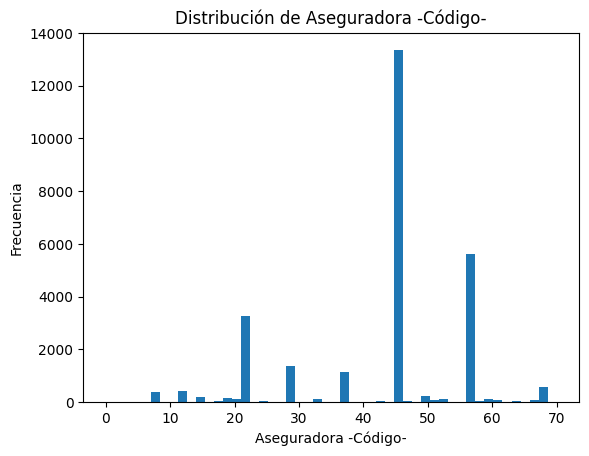

In [10]:
# Histograma para visualizar la distribución de los códigos de aseguradora.
plt.hist(df['Aseguradora -Código-'], bins=50)
plt.xlabel('Aseguradora -Código-')
plt.ylabel('Frecuencia')
plt.title('Distribución de Aseguradora -Código-')
plt.show()

**Edad - Necesita filtrar**

In [11]:
# Analizar la frecuencia de las edades
print('*** Edad ***')
conteo = df['Edad'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

*** Edad ***
Edad
81     592
77     586
68     555
76     551
75     540
      ... 
102      2
106      2
105      1
109      1
104      1
Name: count, Length: 108, dtype: int64
Edad
103    6
101    5
102    2
106    2
105    1
109    1
104    1
Name: count, dtype: int64


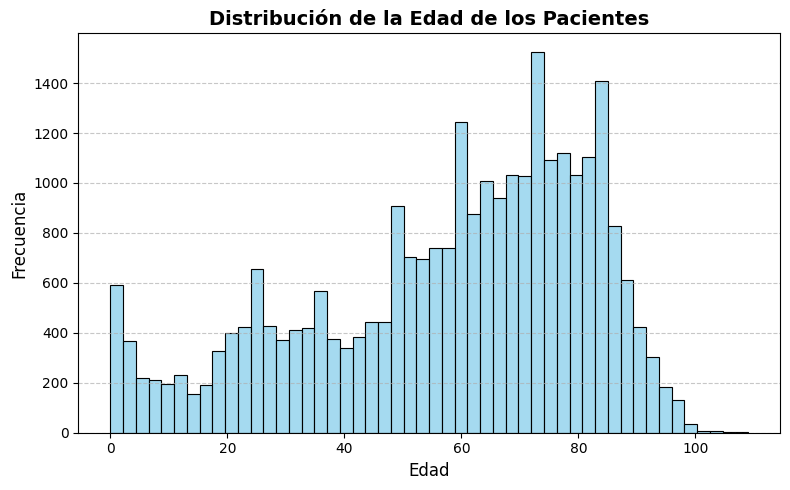

In [12]:
# Histograma para visualizar la distribución de la frecuencia de las edades
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Edad de los Pacientes', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Sexo - No necesita filtrar**

In [13]:
# Analizar la frecuencia de los sexos
print('*** Sexo ***')
conteo = df['Sexo'].value_counts()
print(conteo)

*** Sexo ***
Sexo
M    14353
F    13512
f        2
m        2
Name: count, dtype: int64


In [14]:
# Pasar a mayuscula todos las filas de la columna
df['Sexo'] = df['Sexo'].str.upper()
conteo = df['Sexo'].value_counts()
print(conteo)

Sexo
M    14355
F    13514
Name: count, dtype: int64


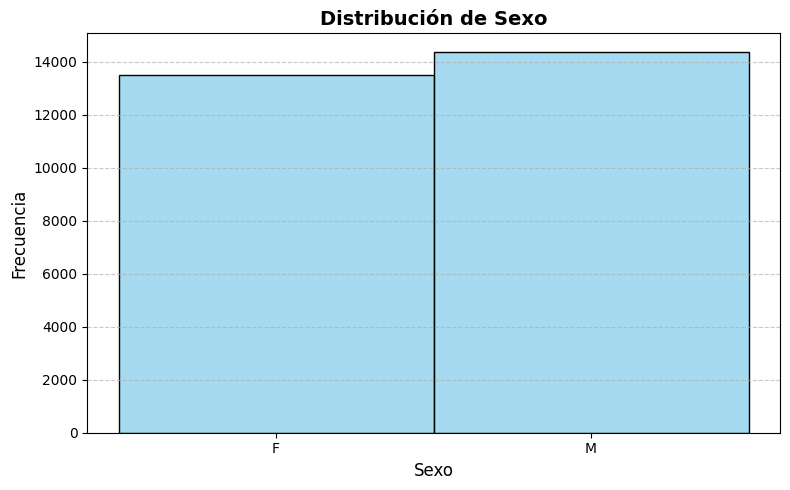

In [15]:
# Histograma para visualizar la distribución de los sexos.
plt.figure(figsize=(8,5))
sns.histplot(df['Sexo'], bins=80, color='skyblue', edgecolor='black')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Sexo', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Codigo de ciudad - Necesita filtrar**

In [16]:
# Analizar la frecuencia de los códigos de ciudad
print('*** Codigo de ciudad ***')
conteo = df['Codigo de ciudad'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

*** Codigo de ciudad ***
Codigo de ciudad
5001     18236
5088      1424
5360       687
5266       614
5212       454
         ...  
25518        1
19142        1
76895        1
18247        1
11010        1
Name: count, Length: 208, dtype: int64
Codigo de ciudad
5660     9
5543     9
5044     8
23555    8
5658     7
        ..
25518    1
19142    1
76895    1
18247    1
11010    1
Name: count, Length: 96, dtype: int64


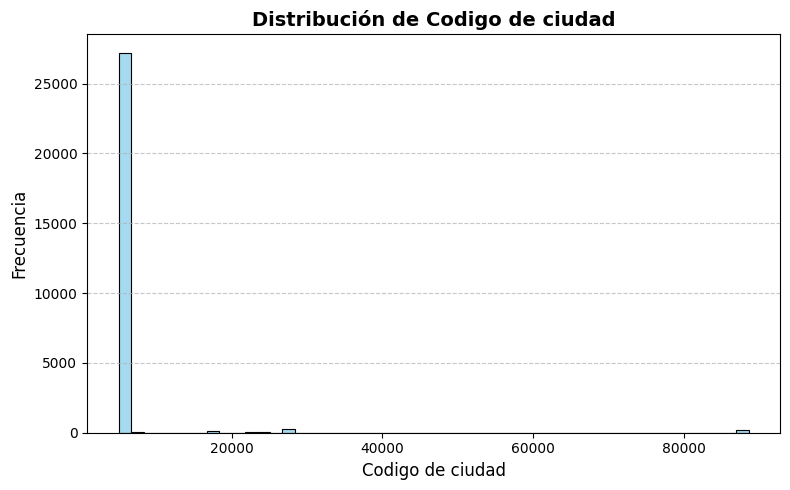

In [17]:
# Histograma para visualizar la distribución de los código de ciudad
plt.figure(figsize=(8,5))
sns.histplot(df['Codigo de ciudad'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Codigo de ciudad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Codigo de ciudad', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Tipo de ingreso - No necesita filtrar**

In [18]:
# Analizar la frecuencia del tipo de ingreso
print('*** Tipo de ingreso ***')
conteo = df['Tipo de ingreso'].value_counts()
print(conteo)

*** Tipo de ingreso ***
Tipo de ingreso
URGENCIA      25570
PROGRAMADO     2294
urgencias         3
Urgencias         1
Programado        1
Name: count, dtype: int64


In [19]:
# Pasar a mayuscula todos las filas de la columna
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.upper()
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.replace('URGENCIAS', 'URGENCIA')
conteo = df['Tipo de ingreso'].value_counts()
print(conteo)

Tipo de ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64


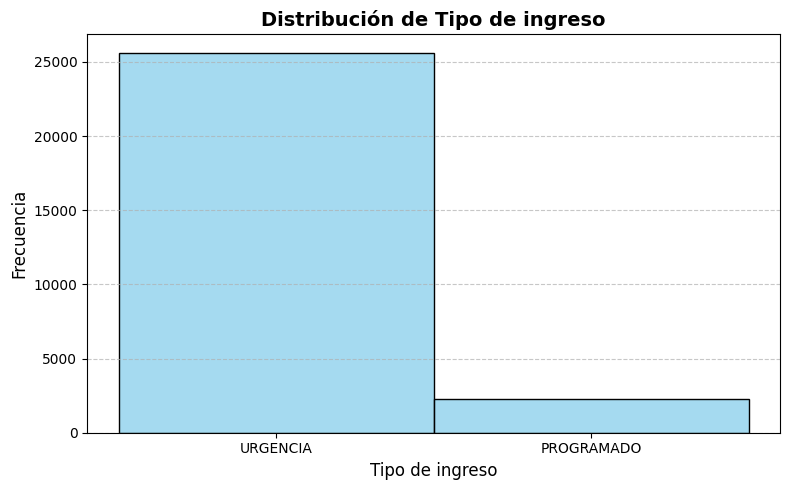

In [20]:
# Histograma para visualizar la distribución de los tipo de ingreso
plt.figure(figsize=(8,5))
sns.histplot(df['Tipo de ingreso'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Tipo de ingreso', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Tipo de ingreso', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Dx de ingreso - No necesita filtrar**

In [21]:
# Analizar la frecuencia de los Dx de ingreso
print('*** Dx de ingreso ***')
conteo = df['Dx de ingreso'].value_counts()
print(conteo)

*** Dx de ingreso ***
Dx de ingreso
2    27356
1      513
Name: count, dtype: int64


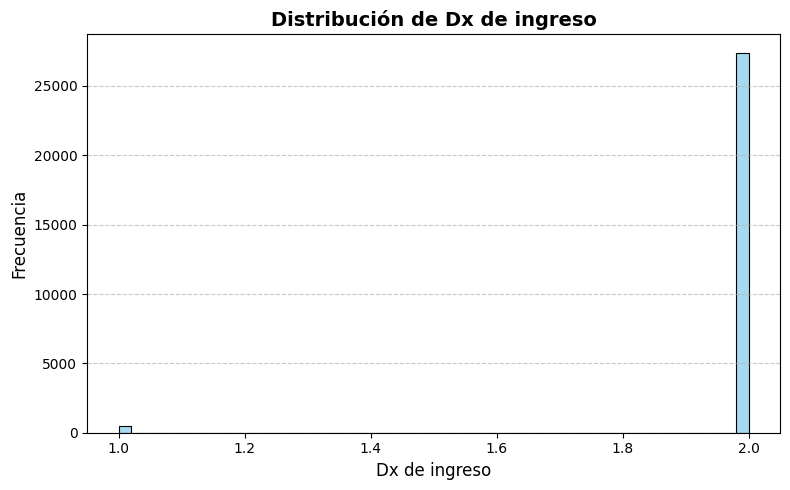

In [22]:
# Histograma para visualizar la distribución de los diagnósticos de ingreso
plt.figure(figsize=(8,5))
sns.histplot(df['Dx de ingreso'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Dx de ingreso', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Dx de ingreso', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Dx Ppal 3 Caracteres - Necesita filtrar**

In [23]:
# Analizar la frecuencia de los Dx Ppal 3 Caracteres
print('*** Dx Ppal 3 Caracteres ***')
conteo = df['Dx Ppal 3 Caracteres'].value_counts()
print(conteo)

*** Dx Ppal 3 Caracteres ***
Dx Ppal 3 Caracteres
OTROS TRASTORNOS DEL SISTEMA URINARIO                                                                            1371
OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRONICAS                                                              1189
NEUMONIA ORGANISMO NO ESPECIFICADO                                                                               1094
DIABETES MELLITUS INSULINODEPENDIENTE                                                                             704
CALCULO DEL RINON Y DEL URETER                                                                                    668
                                                                                                                 ... 
ERISIPELOIDE                                                                                                        1
PENFIGOIDE                                                                                                          1
TUMOR 

**Codificar**

In [24]:
# === Verificar columna y limpiar =====================================
col_diag = "Dx Ppal 3 Caracteres"
if col_diag not in df.columns:
    raise ValueError(f" La columna '{col_diag}' no se encuentra en el archivo.")

df[col_diag] = df[col_diag].astype(str).str.strip()

# === Separar en principal / secundario ===============================
df[['Dx_principal', 'Dx_secundario']] = df[col_diag].str.split(',', n=1, expand=True)
df['Dx_principal']   = df['Dx_principal'].str.strip()
df['Dx_secundario']  = df['Dx_secundario'].fillna('').str.strip()

# === Crear códigos únicos ============================================
todos = pd.Series(pd.concat([df['Dx_principal'], df['Dx_secundario']])).dropna().unique()
dicc_cod = {desc: str(i + 100) for i, desc in enumerate(sorted(todos))}

df['Dx_principal_cod']  = df['Dx_principal'].map(dicc_cod)
df['Dx_secundario_cod'] = df['Dx_secundario'].map(dicc_cod).fillna('')

df['Dx_codificado_final'] = df['Dx_principal_cod'] + df['Dx_secundario_cod']

conteo = df['Dx_codificado_final'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

Dx_codificado_final
701100     1371
606100     1189
527100     1094
251100      704
164100      668
           ... 
334100        1
749100        1
1000100       1
790100        1
917100        1
Name: count, Length: 893, dtype: int64
Dx_codificado_final
568100     9
706100     9
399100     9
756100     9
532100     9
          ..
334100     1
749100     1
1000100    1
790100     1
917100     1
Name: count, Length: 537, dtype: int64


In [25]:
# Normalizar la columna Dx_codificado_final
df['Dx_codificado_final'] = df['Dx_codificado_final'].astype(int)
scaler = MinMaxScaler()
df['Dx_codificado_final_norm'] = scaler.fit_transform(df[['Dx_codificado_final']])

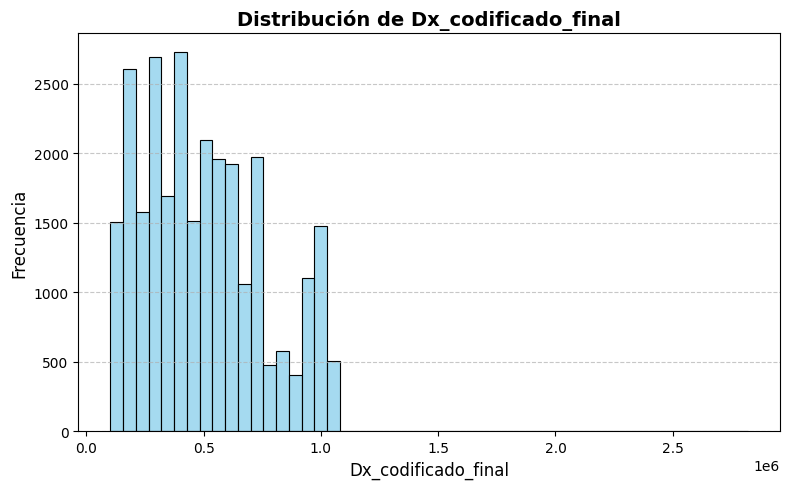

In [26]:
# Histograma para visualizar la distribución de los diagnósticos  codificados  despues de codificar
plt.figure(figsize=(8,5))
sns.histplot(df['Dx_codificado_final'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Dx_codificado_final', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Dx_codificado_final', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Código causa externa**

In [29]:
# Analizar la frecuencia del código causa externa
print('*** Código causa externa  ***')
conteo = df['Código causa externa'].value_counts()
print(conteo)

*** Código causa externa  ***
Código causa externa
Y838    502
W180    455
W188    286
Y95X    252
Y841    245
       ... 
W106      1
W308      1
V801      1
W122      1
W788      1
Name: count, Length: 572, dtype: int64


**Causa externa**

In [30]:
# Analizar la frecuencia del código causa externa
print('***  Causa externa  ***')
conteo = df['Causa externa'].value_counts()
print(conteo)

***  Causa externa  ***
Causa externa
Otros Procedimientos Quirurgicos                                                                                                                    272
Otras Caidas En El Mismo Nivel Vivienda                                                                                                             262
OTROS PROCEDIMIENTOS QUIRURGICOS                                                                                                                    208
OTRAS CAIDAS EN EL MISMO NIVEL VIVIENDA                                                                                                             177
Afeccion Nosocomial                                                                                                                                 176
                                                                                                                                                   ... 
Motociclista Lesionado Por Colision Con Vehiculo D

**Dxr 1 - Necesita filtrar**

In [ ]:
# Analizar la frecuencia de los Dx 1
print('*** Dxr 1 ***')
conteo = df['Dxr 1'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

**Dxr 2 - Necesita filtrar**

In [ ]:
# Analizar la frecuencia de los Dx 2
print('*** Dxr 2 ***')
conteo = df['Dxr 2'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

**Dxr 3 - Necesita filtrar**

In [ ]:
# Analizar la frecuencia de los Dx 3
print('*** Dxr 3 ***')
conteo = df['Dxr 3'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

**Dxr 4 - Necesita filtrar**

In [ ]:
# Analizar la frecuencia de los Dx 4
print('*** Dxr 4 ***')
conteo = df['Dxr 4'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

**GRD -Código - - Necesita filtrar**

In [ ]:
# Analizar la frecuencia de los GRD -Codigo
print('*** GRD -Código ***')
conteo = df['GRD -Código'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

In [ ]:
# Histograma para visualizar la distribución de los GRD -Codigo
plt.figure(figsize=(8,5))
sns.histplot(df['GRD -Código'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GRD -Código', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de GRD -Código', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Tipo GRD - No necesita filtrar**

In [ ]:
# Analizar la frecuencia de los Tipo GRD
print('*** Tipo GRD ***')
df['Tipo GRD'] = df['Tipo GRD'].str.upper()
conteo = df['Tipo GRD'].value_counts()
print(conteo)

In [ ]:
# Transforma la columna 'Tipo GRD' a 1 y 0
df['Tipo GRD'] = df['Tipo GRD'].replace({'M': 1, 'Q': 0})

In [ ]:
# Histograma para visualizar la distribución de los diagnósticos  codificados  despues de codificar
plt.figure(figsize=(8,5))
sns.histplot(df['Tipo GRD'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Tipo GRD', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Tipo GRD', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# ===============================================
# VALORES FALTANTES POR CATEGORÍA
# ===============================================

print("Valores faltantes en 'Tipo GRD':", df['Tipo GRD'].isna().sum())
print("Valores faltantes en 'Tipo GRD':", df['Tipo GRD'].isna().sum())
print("Valores faltantes en 'Dxr 4':", df['Dxr 4'].isna().sum())
print("Valores faltantes en 'Dxr 3':", df['Dxr 3'].isna().sum())
print("Valores faltantes en 'Dxr 2':", df['Dxr 2'].isna().sum())
print("Valores faltantes en 'Dxr 1':", df['Dxr 1'].isna().sum())
print("Valores faltantes en 'Dx_codificado_final':", df['Dx_codificado_final'].isna().sum())
print("Valores faltantes en 'Dx de ingreso':", df['Dx de ingreso'].isna().sum())
print("Valores faltantes en 'Tipo de ingreso':", df['Tipo de ingreso'].isna().sum())
print("Valores faltantes en 'Codigo de ciudad':", df['Codigo de ciudad'].isna().sum())
print("Valores faltantes en 'Sexo':", df['Sexo'].isna().sum())
print("Valores faltantes en 'Edad':", df['Edad'].isna().sum())
print("Valores faltantes en 'Aseguradora -Código-':", df['Aseguradora -Código-'].isna().sum())

In [ ]:
# Codificar variables de diagnóstico
cols_dx = ['Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4']
df[cols_dx] = df[cols_dx].fillna('SinDx')
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[cols_dx] = encoder.fit_transform(df[cols_dx])

In [ ]:
# ===============================================
# VALORES FALTANTES EN LOS DIAGNOSTICOS 1, 2, 3 Y 4
# ===============================================

print("Valores faltantes en 'Dxr 4':", df['Dxr 4'].isna().sum())
print("Valores faltantes en 'Dxr 3':", df['Dxr 3'].isna().sum())
print("Valores faltantes en 'Dxr 2':", df['Dxr 2'].isna().sum())
print("Valores faltantes en 'Dxr 1':", df['Dxr 1'].isna().sum())

In [ ]:
dxr_columns = ['Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4']

for col in dxr_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
dx_cols = ['Dxr 1']
umbral = 10

for col in dx_cols:
    freqs = df[col].value_counts()
    raros = freqs[freqs < umbral].index
    media_col = df[col].mean()
    df[col] = df[col].apply(lambda x: media_col if x in raros else x)


In [ ]:
dx_cols = ['Dxr 2']
umbral = 10

for col in dx_cols:
    freqs = df[col].value_counts()
    raros = freqs[freqs < umbral].index
    media_col = df[col].mean()
    df[col] = df[col].apply(lambda x: media_col if x in raros else x)

In [ ]:
dx_cols = ['Dxr 3']
umbral = 10

for col in dx_cols:
    freqs = df[col].value_counts()
    raros = freqs[freqs < umbral].index
    media_col = df[col].mean()
    df[col] = df[col].apply(lambda x: media_col if x in raros else x)

In [ ]:
dx_cols = ['Dxr 4']
umbral = 10

for col in dx_cols:
    freqs = df[col].value_counts()
    raros = freqs[freqs < umbral].index
    media_col = df[col].mean()
    df[col] = df[col].apply(lambda x: media_col if x in raros else x)

In [ ]:
dx_cols = ['Dx_codificado_final']
umbral = 10

for col in dx_cols:
    freqs = df[col].value_counts()
    raros = freqs[freqs < umbral].index
    media_col = df[col].mean()
    df[col] = df[col].apply(lambda x: media_col if x in raros else x)

In [ ]:
def agrupar_por_decenio(edad):
    inicio = (edad // 10) * 10
    fin = inicio + 9
    media = int((inicio + fin) / 2)
    return media


df['Edad'] = df['Edad'].apply(agrupar_por_decenio)

# 2. Normalizar con RobustScaler
scaler = RobustScaler()
df['Edad'] = scaler.fit_transform(df[['Edad']])

In [ ]:
columna_objetivo = 'GRD -Código'
frecuencias = df[columna_objetivo].value_counts()
codigos_validos = frecuencias[frecuencias >= 70].index
filas_antes = df.shape[0]
df= df[df[columna_objetivo].isin(codigos_validos)]
filas_despues = df.shape[0]
print(f"Filas antes del recorte: {filas_antes}")
print(f"Filas después del recorte: {filas_despues}")

In [ ]:
# Histograma para visualizar la distribución de los GRD -Codigo despues de filtrar
plt.figure(figsize=(8,5))
sns.histplot(df['GRD -Código'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('GRD -Código', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de GRD -Código', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Analizar la frecuencia de los GRD -Código después de filtrar
print('*** GRD -Código ***')
conteo = df['GRD -Código'].value_counts()
print(conteo)
conteo_menores_a_10 = conteo[conteo < 10]
print(conteo_menores_a_10)

In [ ]:
df = df[['GRD -Código', 'Dxr 4', 'Dxr 3', 'Dxr 2', 'Dxr 1','Dx_codificado_final', 'Edad', 'Tipo GRD']]
df.to_excel('/content/drive/MyDrive/Practica 2/df_filtrado.xlsx', index=False)

---
##### 6.  ALGORITMOS DE PREDICCIÓN
---

In [ ]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ===============================================
# ÁRBOL DE DECISIÓN
# ===============================================
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV # Added StratifiedKFold and RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import numpy as np # Import numpy
from sklearn.utils.class_weight import compute_class_weight # Import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')


warnings.filterwarnings('ignore')

# 1. Cargar la base de datos
data = pd.read_excel('/content/drive/MyDrive/Practica 2/df_filtrado.xlsx')

# 2. Preprocesamiento
target_column = 'GRD -Código'
feature_columns = ['Dxr 4', 'Dxr 3', 'Dxr 2', 'Dxr 1','Dx_codificado_final', 'Edad']

X = data[feature_columns]
y = data[target_column]

# Codificar la variable objetivo
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Codificar variables categóricas en X
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':  # Si la columna es tipo texto
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))  # Asegura que no haya nulos y todo sea string

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 3. Definir el árbol de decisión
clf = DecisionTreeClassifier(random_state=100)

# 4. Hiperparámetros encontrados
param_grid = {
    'max_depth': [19,20, 21],
    'min_samples_split': [20, 15, 10, 5],
    'min_samples_leaf': [2,3,4],
    'criterion': ['gini'],
    'class_weight': [None]
}

# 5. GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

# 6. Resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

best_clf = grid_search.best_estimator_

# 7. Evaluación en el conjunto de prueba
y_pred = best_clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_tree = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1_tree = f1_score(y_test, y_pred, average='macro', zero_division=0)


print("\nResultados en el conjunto de prueba:")

print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision macro: {precision_tree:.4f}")
print(f"Recall macro: {recall_tree:.4f}")
print(f"F1 macro: {f1_tree:.4f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

# 8. Validación cruzada en toda la base
cv_scores_tree = cross_val_score(best_clf, X_encoded, y_encoded, cv=5, scoring='balanced_accuracy')
CV_Accuracy_Mean_tree = cv_scores_tree.mean()
print(f"\nAccuracy promedio con validación cruzada del mejor modelo: {CV_Accuracy_Mean_tree:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros encontrados:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 20}

Resultados en el conjunto de prueba:
Accuracy: 0.5435
Precision macro: 0.4910
Recall macro: 0.4915
F1 macro: 0.4795

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        16
           2       0.25      0.21      0.23        19
           3       0.77      0.79      0.78        73
           4       0.56      0.63      0.59        35
           5       0.42      0.29      0.34        17
           6       0.63      0.84      0.72        31
           7       0.57      0.35      0.43        23
           8       0.37      0.48      0.42        21
           9       0.26      0.43      0.33        21
          10       0.38      0.21      0.27        14

In [ ]:
# ===============================================
# RANDOM FOREST
# ===============================================
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV # Added StratifiedKFold and RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # Import evaluation metrics
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# 1. Cargar la base de datos
data = pd.read_excel('/content/drive/MyDrive/Practica 2/df_filtrado.xlsx')

# 2. Preprocesamiento
target_column = 'GRD -Código'
feature_columns = ['Dxr 4', 'Dxr 3', 'Dxr 2', 'Dxr 1','Dx_codificado_final', 'Edad']
X = data[feature_columns]
y = data[target_column]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split( # Use encoded target for splitting
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42 # Stratify by encoded target
)

param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'class_weight': [None],
}
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# 8. Evaluación simple
# Use the best_clf to make predictions and evaluate
print(f"Precisión (Accuracy en el test set): {best_clf.score(X_test, y_test_encoded):.2%}") # Evaluate on encoded test set
print("\nResultados en el conjunto de prueba:")

# Make predictions on the test set to get metrics using the best_clf
y_pred_encoded = best_clf.predict(X_test)
accuracy_random = accuracy_score(y_test_encoded, y_pred_encoded)
precision_random = precision_score(y_test_encoded, y_pred_encoded, average='macro')
recall_random = recall_score(y_test_encoded, y_pred_encoded, average='macro')
f1_random = f1_score(y_test_encoded, y_pred_encoded, average='macro')


print(f"Accuracy: {accuracy_random:.4f}") # Compare encoded test and prediction
print(f"Precision macro: {precision_random:.4f}")
print(f"Recall macro: {recall_random:.4f}")
print(f"F1 macro: {f1_random:.4f}")

# 8. Validación cruzada en todos los datos
cv_scores_random = cross_val_score(best_clf, X, y_encoded, cv=5, scoring='balanced_accuracy').mean()
CV_Accuracy_Mean_random = cv_scores_random.mean()


print(f"\nAccuracy promedio con validación cruzada: {CV_Accuracy_Mean_random:.4f}")

Precisión (Accuracy en el test set): 53.44%

Resultados en el conjunto de prueba:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5344
Precision macro: 0.4470
Recall macro: 0.4512
F1 macro: 0.4321


In [ ]:
# ===============================================
# XGBOOST
# ===============================================
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV # Added StratifiedKFold and RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import numpy as np # Import numpy
from sklearn.utils.class_weight import compute_class_weight # Import compute_class_weight

warnings.filterwarnings("ignore")

target_column = 'GRD -Código'
feature_columns = ['Dxr 4', 'Dxr 3', 'Dxr 2', 'Dxr 1','Dx_codificado_final', 'Edad']
X = data[feature_columns]
y = data[target_column]


# 3. Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42) # Use y_encoded

# 5. Definir el modelo XGBoost
xgb = XGBClassifier(
    objective='multi:softmax',  # Para clasificación multiclase con etiquetas como números
    num_class=len(le.classes_), # Use the number of unique classes from the LabelEncoder
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

# 6. Búsqueda de hiperparámetros

param_grid = {
    'max_depth': [8],
    'learning_rate': [0.03],
    'n_estimators': [149],
    'subsample': [1],
    'colsample_bytree': [0.8]
}


grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# 7. Evaluación del mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)

Accuracy_XB = accuracy_score(y_test, y_pred)
Precision_macro_XB = precision_score(y_test, y_pred, average='macro')
Recall_macro_XB = recall_score(y_test, y_pred, average='macro')
F1_macro_XB = f1_score(y_test, y_pred, average='macro')


print("\nResultados en el conjunto de prueba:")
print(f"Accuracy: {Accuracy_XB:.4f}")
print(f"Precision macro: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall macro: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 macro: {f1_score(y_test, y_pred, average='macro'):.4f}")
print("\nReporte de clasificación:")
# Use inverse_transform to get original class labels in the classification report
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))

# 8. Validación cruzada en todos los datos
cv_scores_XB = cross_val_score(best_model, X, y_encoded, cv=5, scoring='balanced_accuracy').mean()
CV_Accuracy_Mean_XB = cv_scores_XB.mean()

print(f"\nAccuracy promedio con validación cruzada: {CV_Accuracy_Mean_XB:.4f}")

---
##### 7.  ANÁLISIS COMPARATIVO DE LOS ALGORITMOS
---

In [ ]:
# Diccionarios que ya generaste
result_tree = {
    "Modelo": "DecisionTree",
    "Accuracy": accuracy_tree,
    "Precision_macro": precision_tree,
    "Recall_macro": recall_tree,
    "F1_macro": f1_tree,
    "CV_Accuracy_Mean": CV_Accuracy_Mean_tree
}

result_random = {
    "Modelo": "RandomForest",
    "Accuracy": accuracy_random,
    "Precision_macro": precision_random,
    "Recall_macro": recall_random,
    "F1_macro": f1_random,
    "CV_Accuracy_Mean": CV_Accuracy_Mean_random
}

result_xgboost = {
    "Modelo": "XGBoost",
    "Accuracy": Accuracy_XB,
    "Precision_macro": Precision_macro_XB,
    "Recall_macro": Recall_macro_XB,
    "F1_macro": F1_macro_XB,
    "CV_Accuracy_Mean": CV_Accuracy_Mean_XB
}

# Lista de diccionarios
metrics = [result_tree, result_random, result_xgboost]

# Crear DataFrame con pandas
df_metrics = pd.DataFrame(metrics)

# Poner 'Modelo' como índice para mejor visualización
df_metrics.set_index('Modelo', inplace=True)

# Mostrar tabla
print("\nMétricas comparativas de cada modelo:\n")
print(df_metrics)

In [ ]:

# ============================================================
# 1. MÉTRICAS YA RELLENAS
# ============================================================
metrics = [result_tree, result_random, result_xgboost]

df_metrics = pd.DataFrame(metrics).set_index("Modelo")
print("📊 Métricas de cada modelo:\n")
display(df_metrics)

# ============================================================
# 2. ANÁLISIS ESTADÍSTICO Y COMPARATIVO
# ============================================================

# a) Resumen estadístico
summary = df_metrics.agg(['mean', 'std', 'min', 'max']).T
print("\n📈 Resumen estadístico:\n")
display(summary)

# b) Ranking de modelos (1 = mejor)
rankings = df_metrics.rank(ascending=False, method="min")
print("\n🏆 Ranking (1 = mejor por métrica):\n")
display(rankings)

# c) Mejor modelo en F1_macro
best_f1_model = df_metrics['F1_macro'].idxmax()
best_f1_value = df_metrics.loc[best_f1_model, 'F1_macro']
print(f"\n🥇 Mejor modelo según F1_macro: {best_f1_model} (F1 = {best_f1_value:.4f})")

# d) Brecha porcentual en F1 vs. el mejor modelo
df_metrics['Δ_F1_%_vs_mejor'] = round(100 * (best_f1_value - df_metrics['F1_macro']) / best_f1_value, 2)

print("\n🔍 Diferencia porcentual en F1 respecto al mejor modelo:\n")
display(df_metrics[['F1_macro', 'Δ_F1_%_vs_mejor']])

In [ ]:
# ---------------- 1. Preparar datos ----------------
X = df.drop(['GRD -Código', 'Tipo GRD'], axis=1)
y_grd  = df['GRD -Código']
y_tipo = df['Tipo GRD']

# Codificar objetivos
le_grd  = LabelEncoder(); y_grd_enc  = le_grd.fit_transform(y_grd)
le_tipo = LabelEncoder(); y_tipo_enc = le_tipo.fit_transform(y_tipo)

# Split único para ambos objetivos
X_tr, X_te, y_grd_tr, y_grd_te, y_tipo_tr, y_tipo_te = train_test_split(
    X, y_grd_enc, y_tipo_enc, test_size=0.2, stratify=y_grd_enc, random_state=42
)

# ---------------- 2. Modelo 1: GRD -Código ----------------
model_grd = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_grd.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
model_grd.fit(X_tr, y_grd_tr)

# Predicciones en train y test
y_grd_tr_pred = model_grd.predict(X_tr)
y_grd_te_pred = model_grd.predict(X_te)

# ---------------- 3. Construir features para modelo 2 ----------------
# Mismo nombre de columna en ambos conjuntos
X_tipo_tr = pd.DataFrame({'GRD_pred': y_grd_tr_pred})
X_tipo_te = pd.DataFrame({'GRD_pred': y_grd_te_pred})

# ---------------- 4. Modelo 2: Tipo GRD ----------------
model_tipo = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le_tipo.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)
model_tipo.fit(X_tipo_tr, y_tipo_tr)

# ---------------- 5. Evaluación final ----------------
y_tipo_pred = model_tipo.predict(X_tipo_te)

print("Resultados predicción final de 'Tipo GRD':")
print(f"Accuracy: {accuracy_score(y_tipo_te, y_tipo_pred):.4f}")
print(classification_report(
    le_tipo.inverse_transform(y_tipo_te),
    le_tipo.inverse_transform(y_tipo_pred)
))

En la comparación de los modelos evaluados, se observó que el algoritmo XGBoost presentó la mayor precisión (accuracy) en el conjunto de prueba, alcanzando un valor de 63.21%. Este modelo mostró un desempeño ligeramente superior en las métricas de precisión macro, recall macro y F1 macro en comparación con los otros algoritmos evaluados. Por su parte, el modelo Random Forest obtuvo una precisión del 56.6%, con valores de precisión macro, recall macro y F1 macro cercanos a los de XGBoost. Finalmente, el modelo de Decision Tree presentó la precisión más baja, con un valor de 53.35%, y métricas macro inferiores en comparación con los otros dos modelos. Sin embargo, estos resultados están condicionados a la variable *Dx Ppal 3 Caracteres*, la cual si bien no se obtiene durante el triaje, se obtiene durante las primeras etapas en el proceso de atención de los pacientes y esta se relaciona directamente con el GRD- Codigo; lo cual no se ve representado en las otras variables de entrada de interés para el entrenamiento de los modelos.



El  GRD Codigo poseía 604 clases, la clase con mayor frecuencia tenia 732 repeticiones. A esta variable se le puso un umbral de 70, es decir, todas los datos relacionados a esas filas fueron eliminados de la base de la base de datos.

Si bien los resultados muestran diferencias entre los algoritmos, todos presentan limitaciones inherentes al tipo de problema y a las características de la base de datos. Una de las principales limitaciones es la complejidad del problema multiclase y la presencia de clases desbalanceadas, lo que afecta la capacidad de los modelos para predecir adecuadamente las categorías menos representadas. Aunque se utilizó balanceo en la fase de entrenamiento, este ajuste no garantiza que las métricas macro sean elevadas, especialmente cuando la estructura de los datos no proporciona suficiente información discriminante entre clases.

Además, el desempeño de los modelos esta condicionado por la calidad de las variables utilizadas, donde la mayoría de categorías tienen desbalance estructural que impacta la capacidad predictiva.

El modelo XGBoost, se ha reportado en la literatura como un entrenamiento de buen rendimiento a pesar de que puede requerir tiempos de entrenamiento más prolongados y mayor capacidad computacional, lo que representa una limitacion en entornos donde los recursos son restringidos o donde se requiere una respuesta inmediata.

Por otro lado, el árbol de decisión y Random Forest, al ser modelos basados en particiones, pueden ser sensibles a la configuración de los hiperparámetros y al preprocesamiento de las variables categóricas, lo que puede afectar su estabilidad y su capacidad de generalización.

Otra posible limitación es la forma en que se codificaron las variables categóricas, ya que el uso de codificación por etiquetas (Label Encoding) en variables con múltiples categorías puede inducir un orden artificial que no refleja relaciones reales entre las clases, afectando el proceso de aprendizaje, especialmente en algoritmos basados en distancias o en particiones jerárquicas. Estas condiciones sugieren que, aunque los modelos ofrecen un desempeño aceptable, existen restricciones relacionadas con la estructura de los datos, el balance de clases y las decisiones de preprocesamiento que pueden limitar la capacidad predictiva de los algoritmos evaluados.